In [1489]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
import datetime
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_palette(sns.color_palette("deep", 10))
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean
from ploting import *

%matplotlib inline

from datetime import datetime
str(datetime.now())

'2018-02-27 18:39:57.055362'

In [1490]:
def savefig(filename):
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/latex version/img/{}.pgf'.format(filename))
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/latex version/img/{}.pdf'.format(filename))
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/tables and figures/img/{}.pgf'.format(filename))
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/tables and figures/img/{}.pdf'.format(filename))

In [1491]:
from ploting import *
plotter = ResultsPlotter(f='../IO/equal_rates_96.mat')


In [1492]:
sediment_data = pd.read_excel('Vansjo/App P VanI-II-III QC Jan 2017.xlsx', sheetname='Van-I', skiprows=1)
sediment_data= sediment_data.convert_objects(convert_numeric=True)
# sediment_data

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [1493]:
# g = sns.PairGrid(sediment_data[['P','Al', 'Ca', 'Fe', 'K', 'Mg']][2:]) 
# g.map_upper(sns.regplot) 
# g.map_lower(sns.residplot) 

In [1494]:
y_a =0.215

In [1495]:
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline, UnivariateSpline

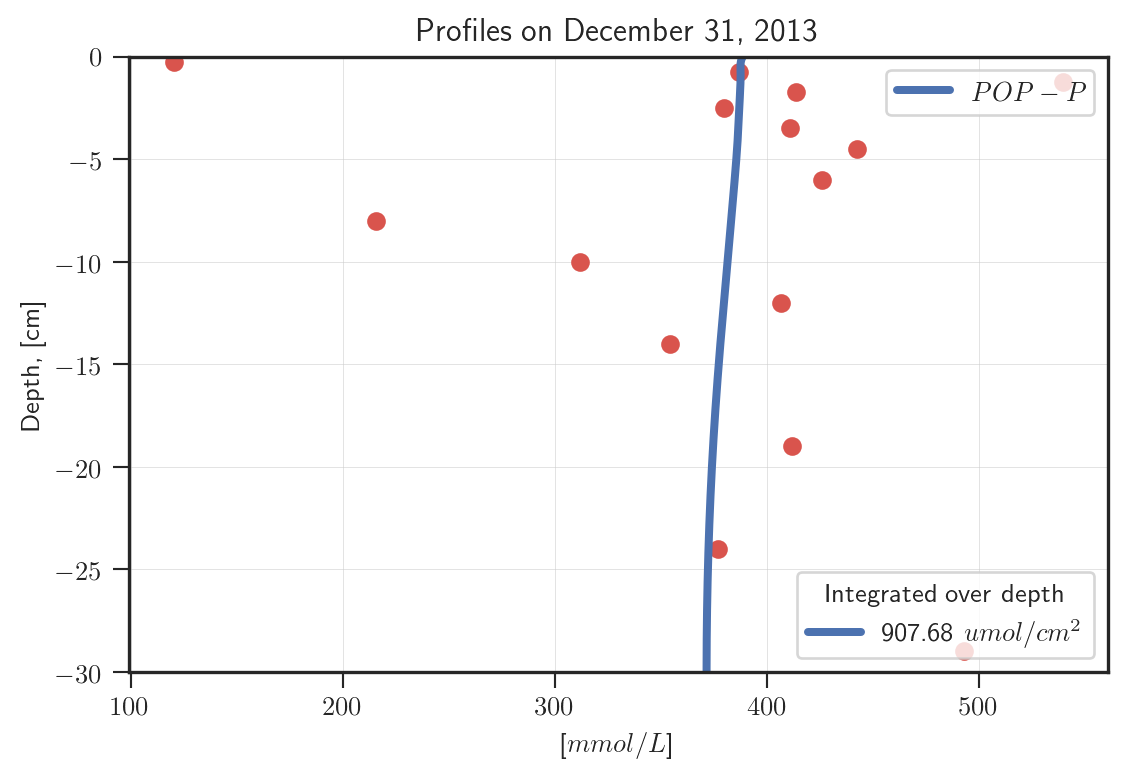

In [1496]:
ius = UnivariateSpline(sediment_data['Depth'][2:], sediment_data['Organic-P'][2:]/30.973*1000)
# yi = ius(-z)
# list(yi)
ax = plotter.profile('sediment', ['POP'], years_ago=0)
plt.scatter(sediment_data['Organic-P']/30.973*2.5*1000, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)
# plt.plot(yi, -z, '-.',c=sns.xkcd_rgb["pale red"], label=None)


In [1497]:
ius = UnivariateSpline(sediment_data['Depth'][2:], (sediment_data['P'][2:] + sediment_data['Loose-bound-P'][2:])/30.973)
# yi = ius(-z)
# list(yi)

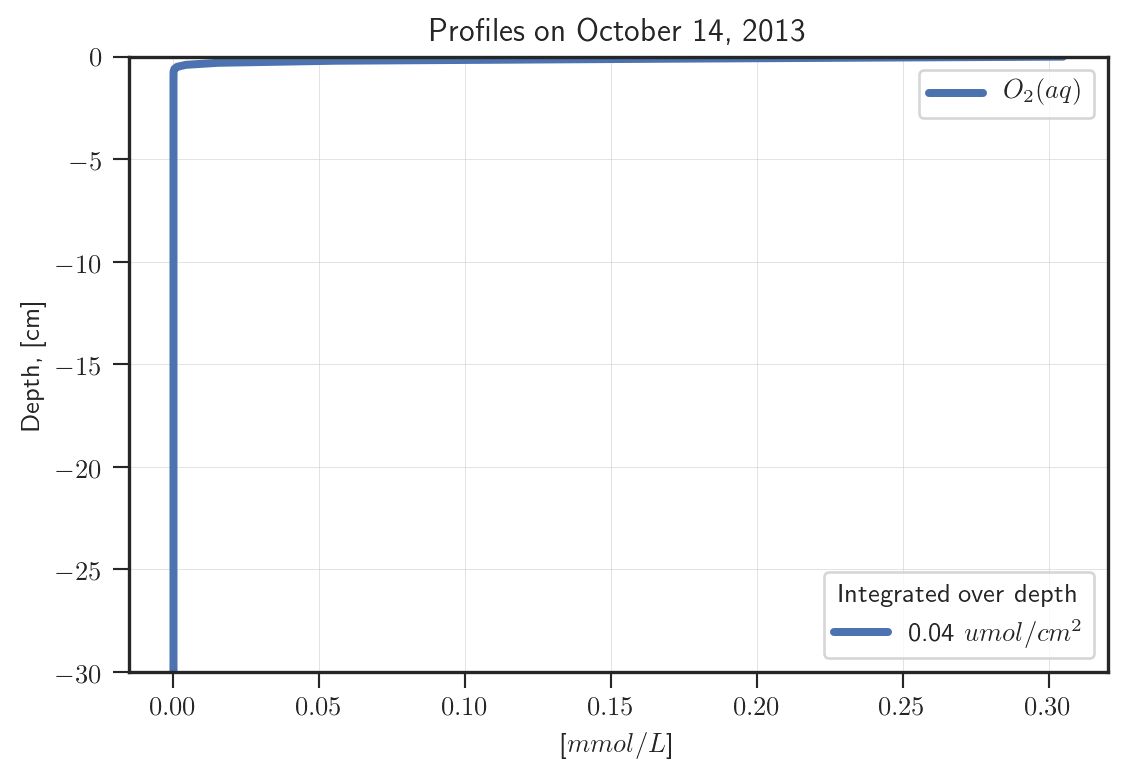

In [1498]:
ax = plotter.profile('sediment', ['O2'], years_ago=y_a)

(-30, 0)

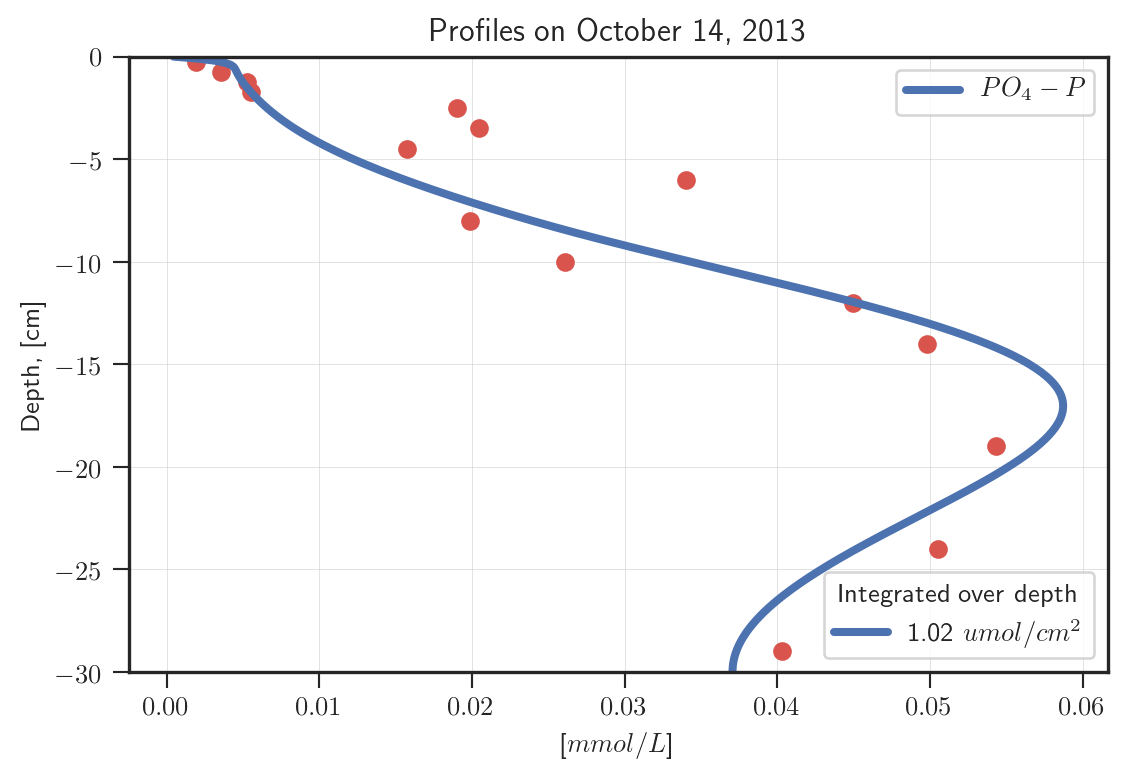

In [1499]:
ax = plotter.profile('sediment', ['PO4'], years_ago=y_a)
ax.scatter(sediment_data['P']/30.973 + sediment_data['Loose-bound-P']/30.973, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)
# plt.plot(yi, -z, '-.',c=sns.xkcd_rgb["pale red"], label=None)
ax.set_ylim(-30,0)

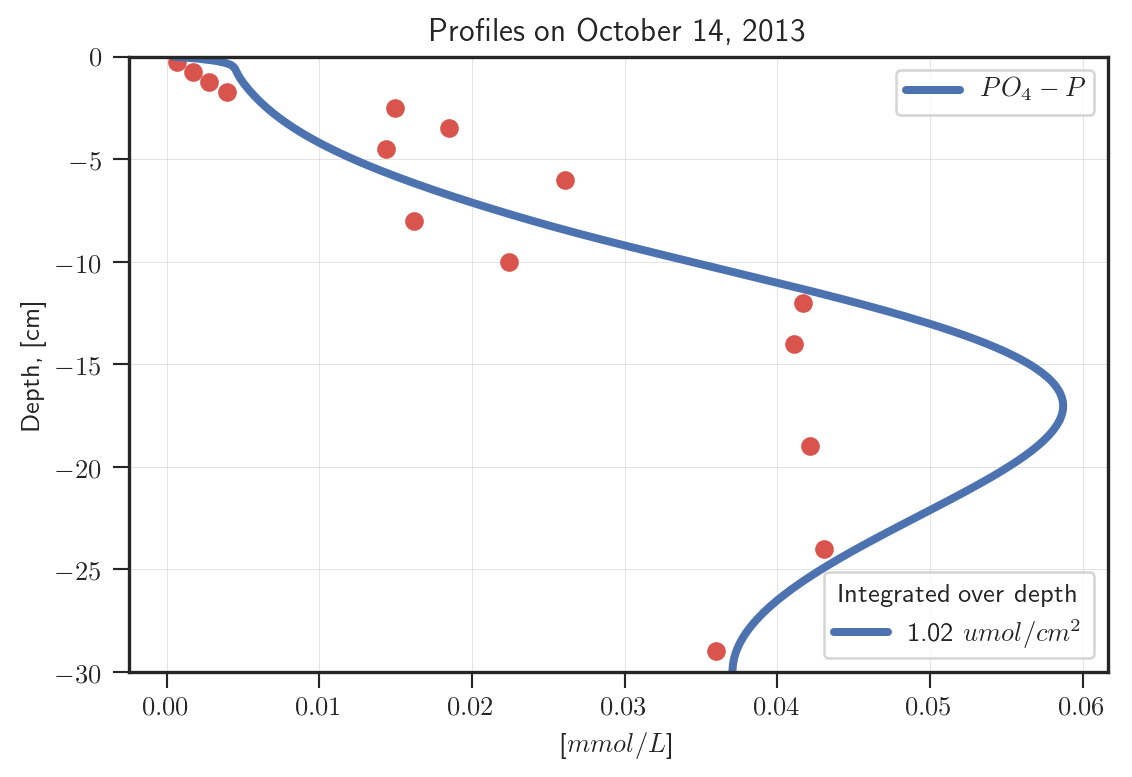

In [1500]:
ax = plotter.profile('sediment', ['PO4'], years_ago=y_a)
ax.scatter(sediment_data['P']/30.973, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)
# ax.set_xlim(0,1)

In [1501]:
# ax = plotter.profile('sediment', ['Fe2'], years_ago=y_a)
ax.scatter(sediment_data['Fe']/55.845, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)

In [1502]:
ius = UnivariateSpline(sediment_data['Depth'][2:], (sediment_data['Ca'][2:])/80.1560)
# yi = ius(-z)
# list(yi)

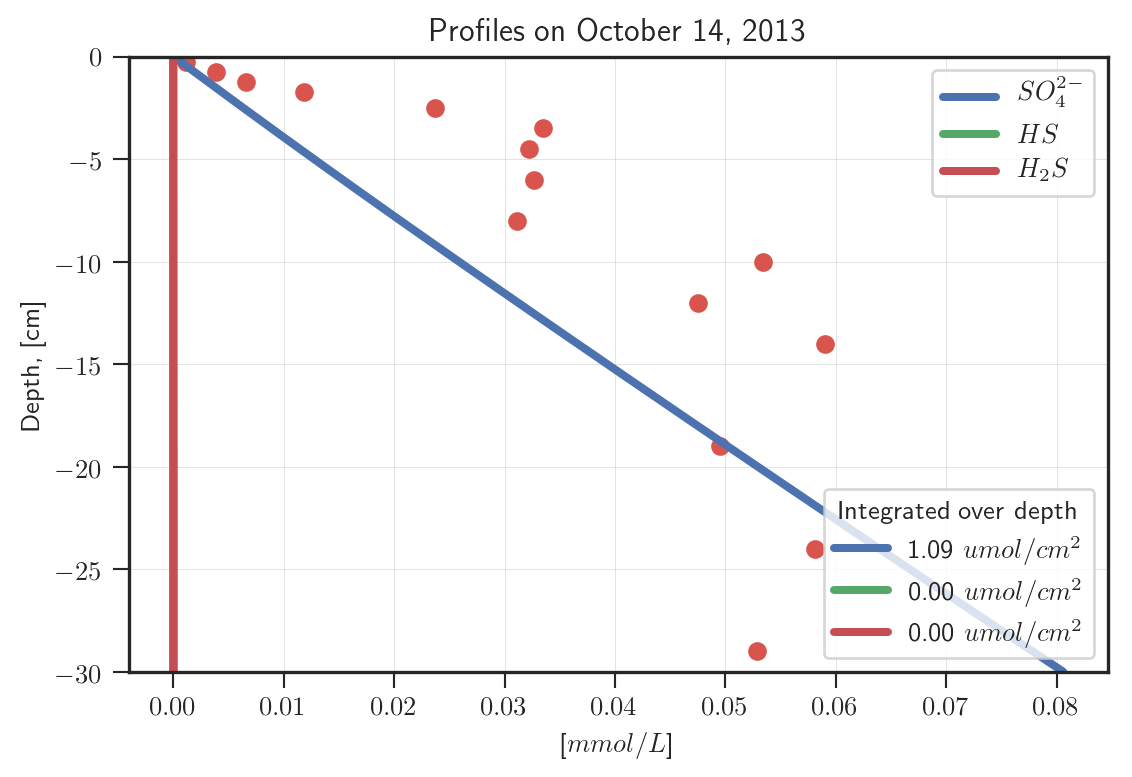

In [1503]:
ius = Rbf(sediment_data['Depth'][2:], sediment_data['S'][2:]/32)
# yi = ius(-z)
# list(yi)
ax = plotter.profile('sediment', ['SO4', 'HS', 'H2S'], years_ago=y_a)
ax.scatter(sediment_data['S']/32, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)
# ax.plot(yi, -z, '-.',c=sns.xkcd_rgb["pale red"], label=None)

In [1504]:
ius = Rbf(sediment_data['Depth'][2:], sediment_data['Fe-P'][2:]/30.973)
# yi = ius(-z)
# list(yi)

(0, 2000)

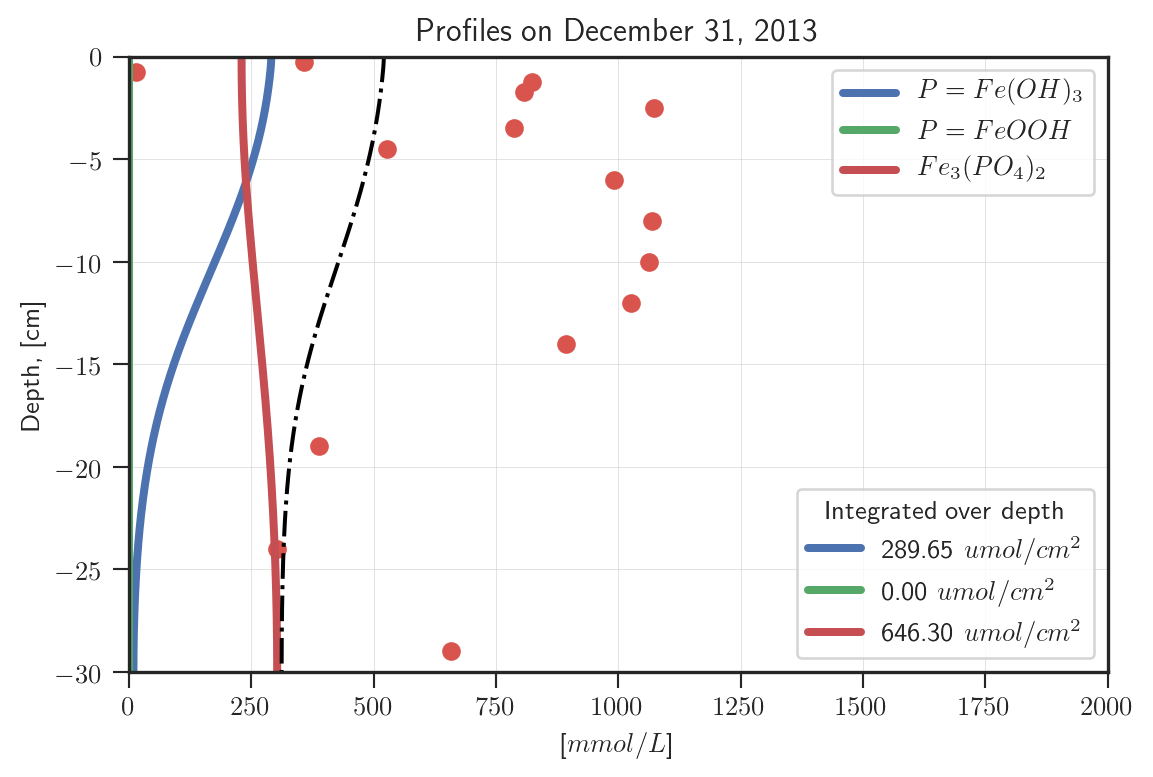

In [1505]:
init_a = 19.0105
ax = plotter.profile_with_sum('sediment', ['PO4adsa', 'PO4adsb', 'Fe3PO42'], years_ago=0.)
# ax = plotter.profile('sediment', ['PO4adsa', 'PO4adsb', 'Fe3PO42'], years_ago=0)
# ax = plotter.profile_with_sum('sediment', ['PO4adsa', 'PO4adsb', 'Fe3PO42'], years_ago=0)
ax.scatter(sediment_data['Fe-P']/30.973*2.5*1000, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)
# ax.plot(yi, -z, '-.',c=sns.xkcd_rgb["pale red"], label=None)
plt.xlim(0,2000)

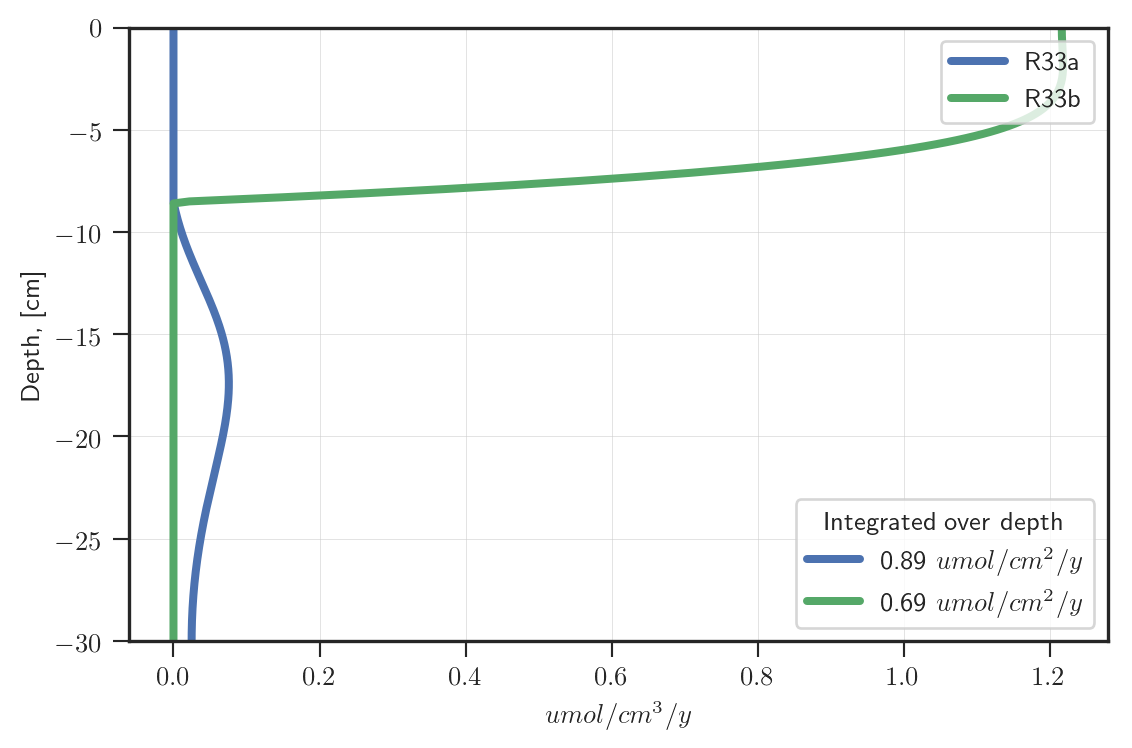

In [1506]:
ax = plotter.rate_profile('sediment', ['R33a', 'R33b'])

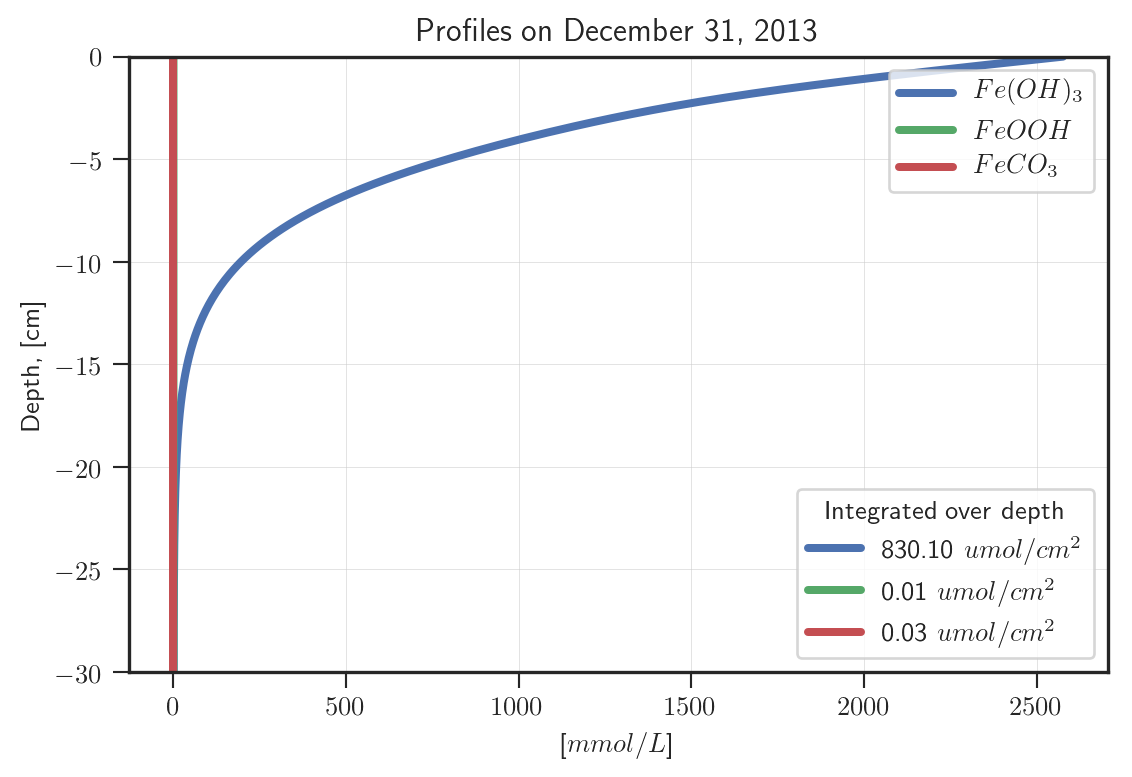

In [1507]:
ax = plotter.profile('sediment', ['FeOH3', 'FeOOH', 'FeCO3'], years_ago=0)

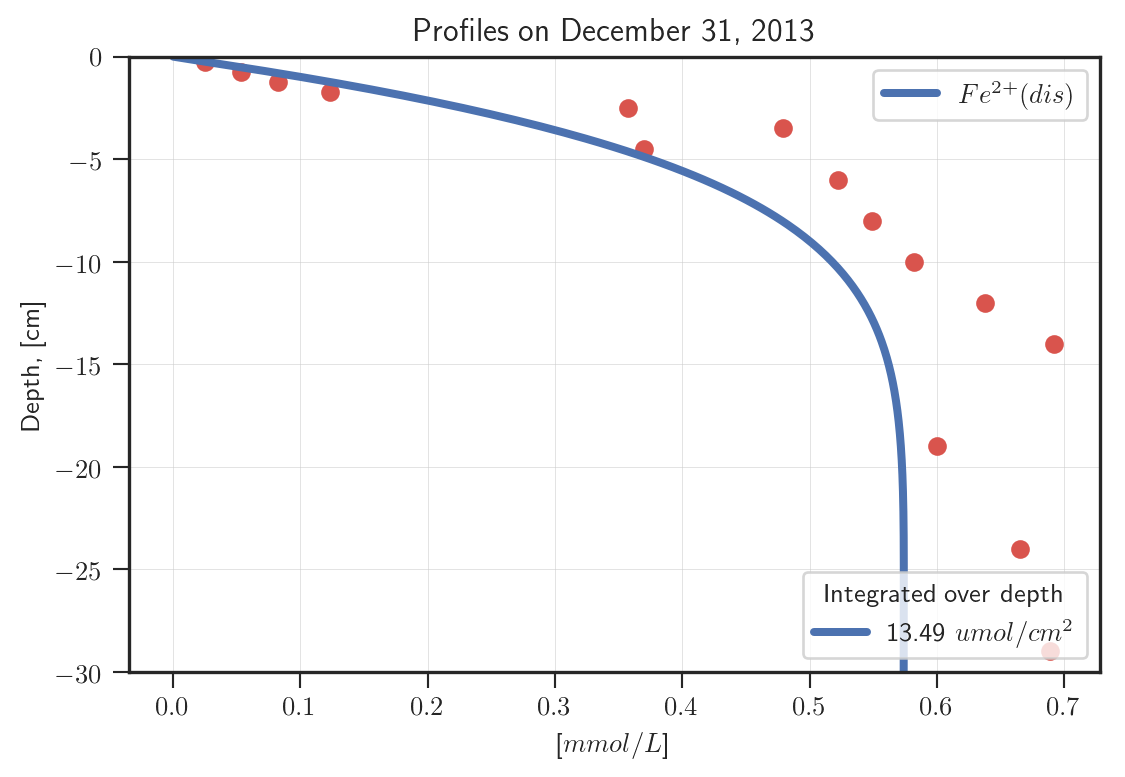

In [1508]:
ius = UnivariateSpline(sediment_data['Depth'][2:], sediment_data['Fe'][2:]/55.8)
# yi = ius(-z)
# list(yi)
ax = plotter.profile('sediment', ['Fe2d'], years_ago=0, coef=1)
plt.scatter(sediment_data['Fe']/55.8, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)
# ax.plot(yi, -z, '-.',c=sns.xkcd_rgb["pale red"], label=None)

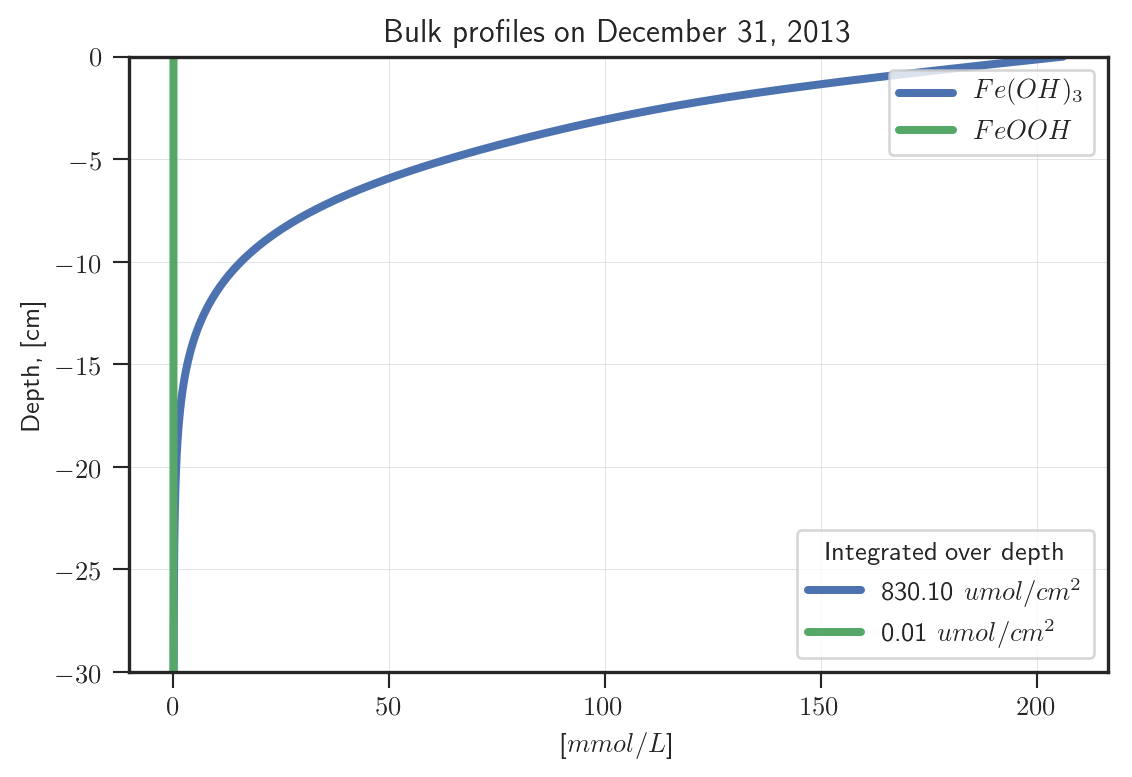

In [1509]:
init_a = 19.0105
ax = plotter.bulk_sediment_profile([ 'FeOH3', 'FeOOH'], years_ago=0)
# ax.scatter(sediment_data['Fe-P']/30.973, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)
# ax.plot(yi, -z, '-.',c=sns.xkcd_rgb["pale red"], label=None)
# plt.xlim(0,1)

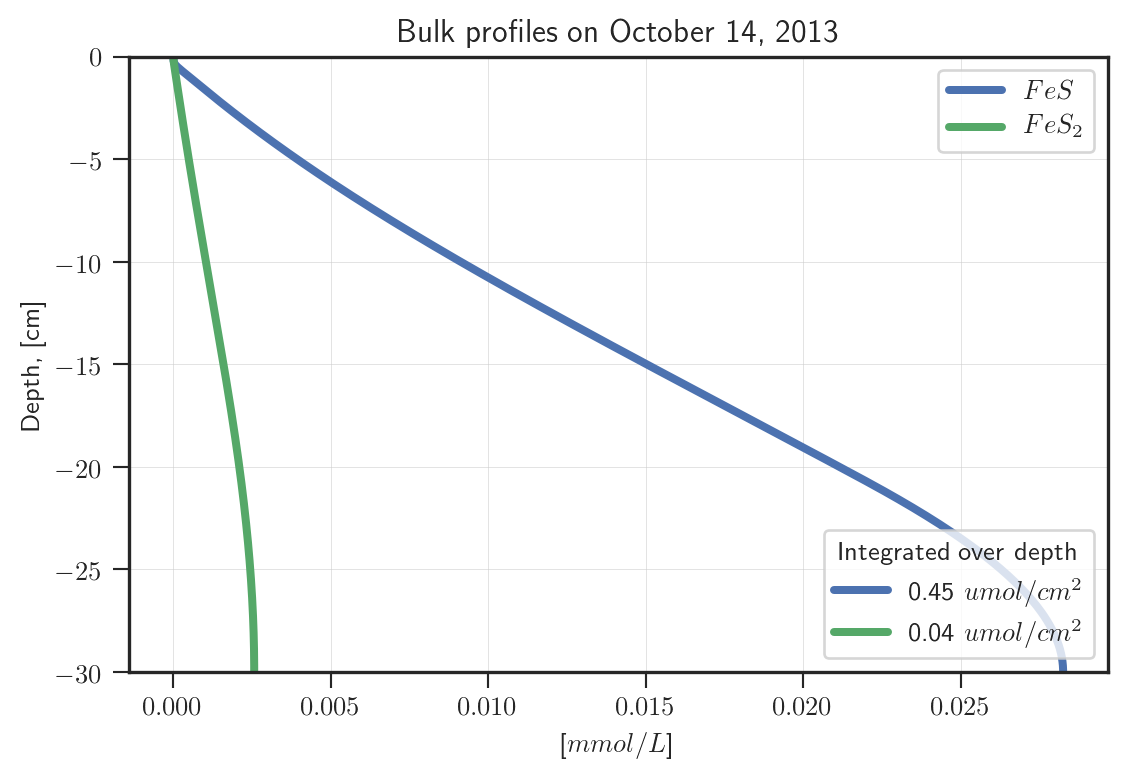

In [1510]:
ax = plotter.bulk_sediment_profile(['FeS', 'FeS2'], years_ago=y_a)

In [1511]:
ius = UnivariateSpline(sediment_data['Depth'][2:], sediment_data['Ca-P'][2:]/30.973)
# yi = ius(-z)
# list(yi)

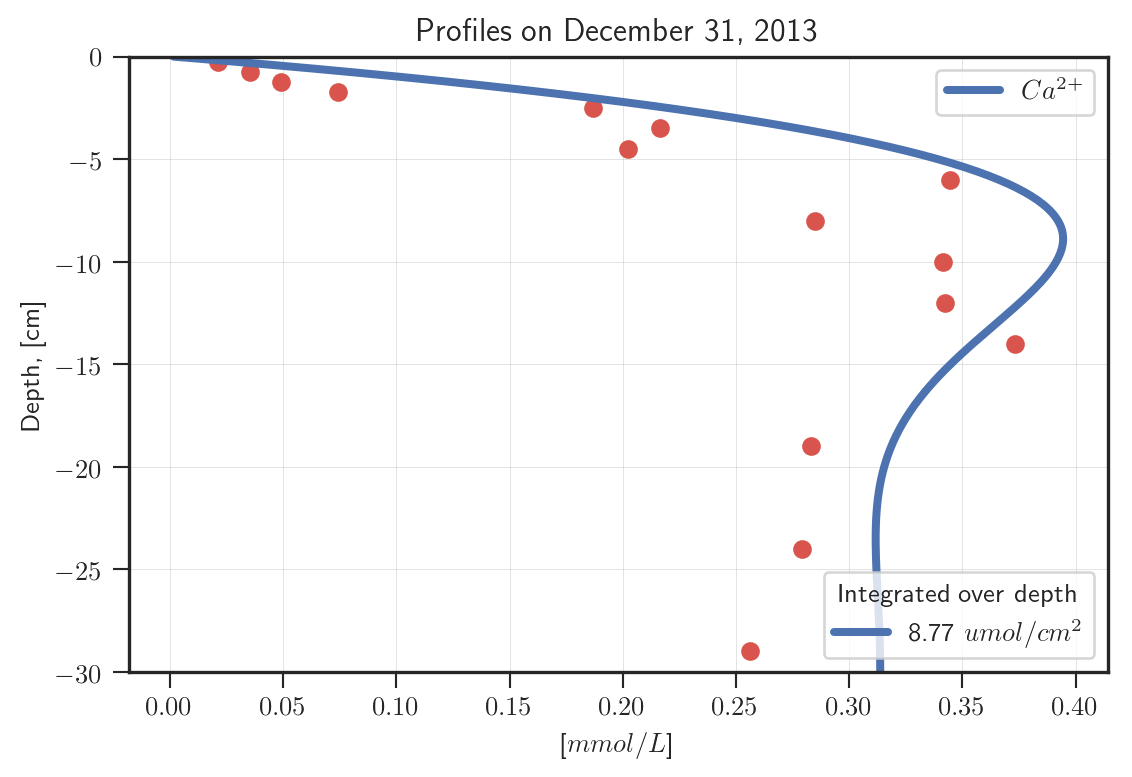

In [1512]:
ax = plotter.profile('sediment', ['Ca2'], years_ago=0, convert_units=0)
ax.scatter(sediment_data['Ca']/40.078, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)
# plt.plot(yi, -z, '-.',c=sns.xkcd_rgb["pale red"], label=None)
# ax.set_xlim(0,0.07)

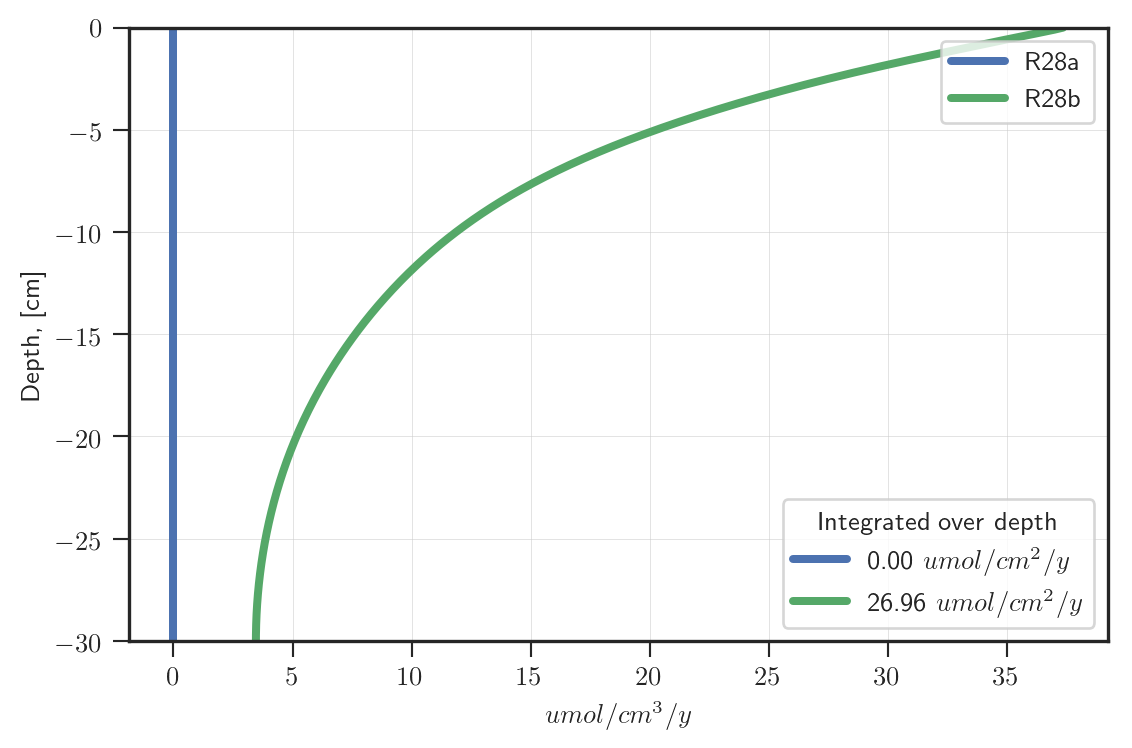

In [1513]:
ax = plotter.rate_profile('sediment', ['R28a', 'R28b'], years_ago=0)

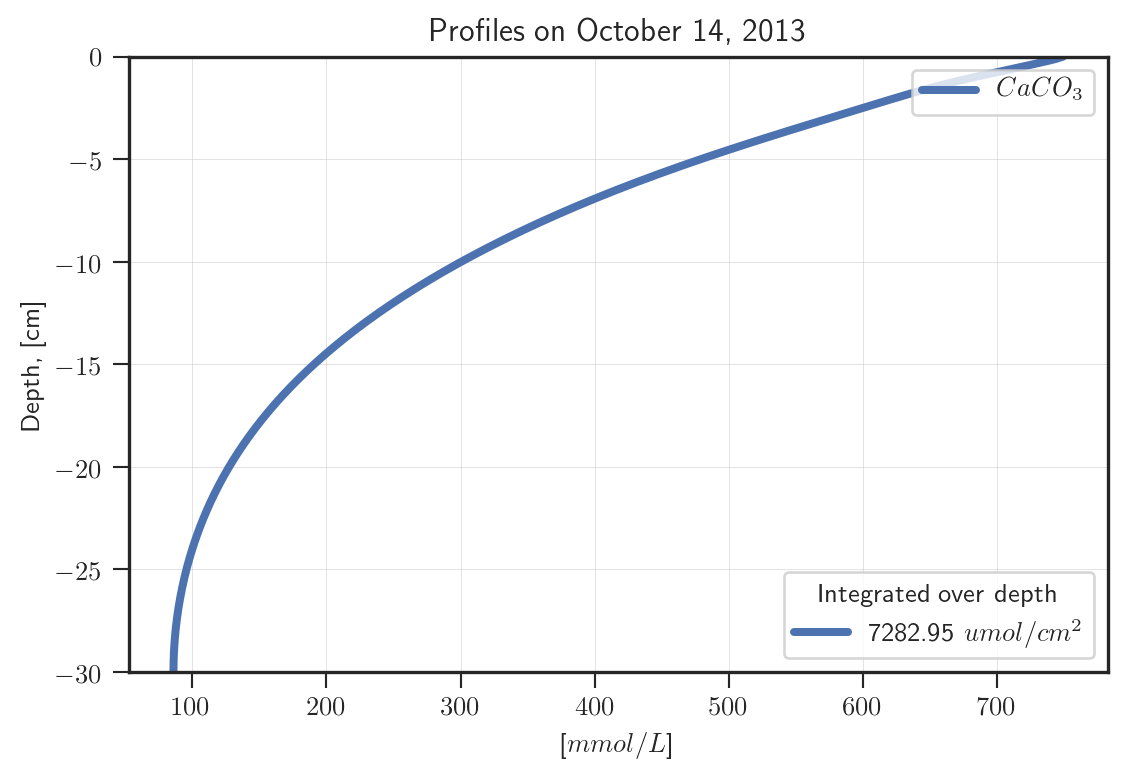

In [1514]:
ax = plotter.profile('sediment', ['CaCO3'], years_ago=y_a)

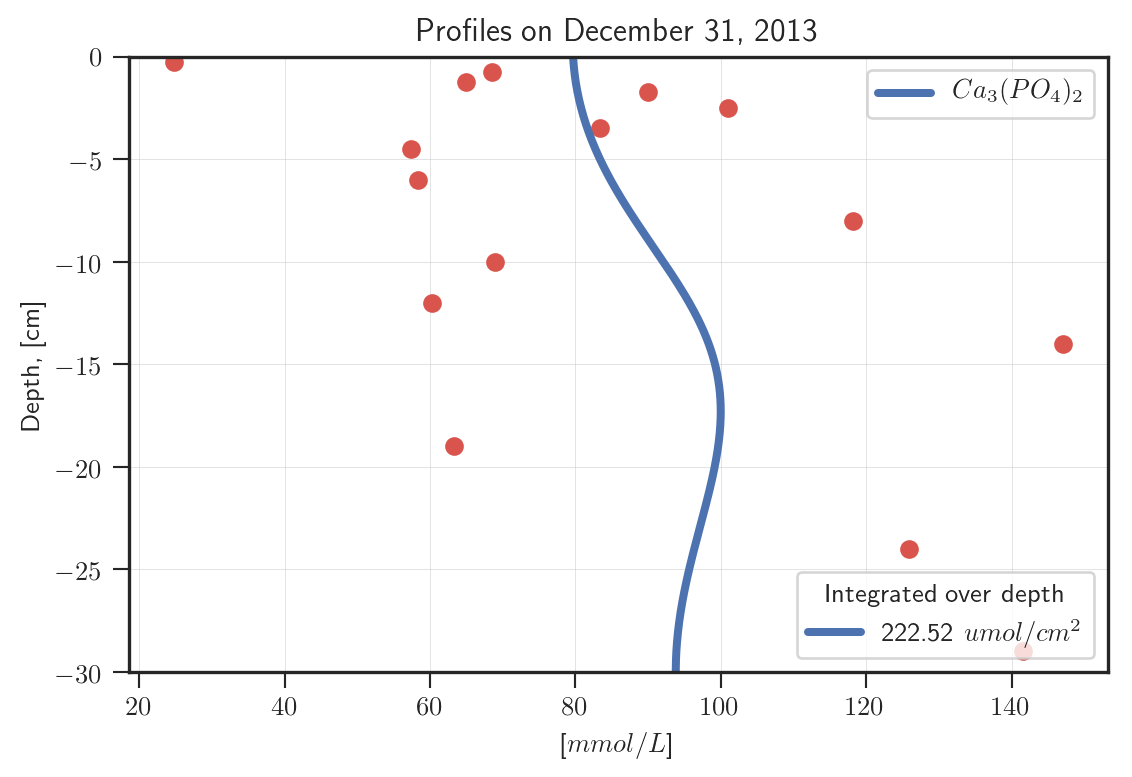

In [1515]:
ax = plotter.profile('sediment', ['Ca3PO42'], years_ago=0, coef=1)
ax.scatter(sediment_data['Ca-P']/2/30.973*2500, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)
# ax.plot(yi, -z, '-.',c=sns.xkcd_rgb["pale red"], label=None)

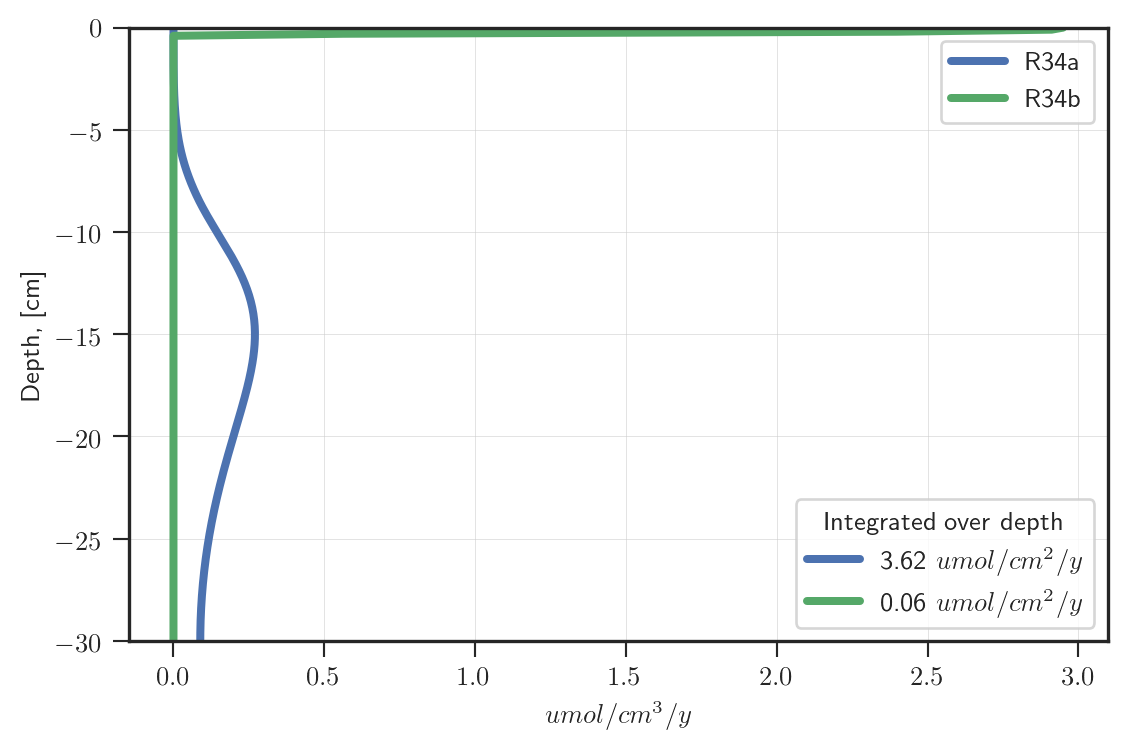

In [1516]:
ax = plotter.rate_profile('sediment', ['R34a', 'R34b'], years_ago=0)

In [1517]:
ius = UnivariateSpline(sediment_data['Depth'][2:], sediment_data['Al-P'][2:]/30.973)
# yi = ius(-z)
# list(yi)

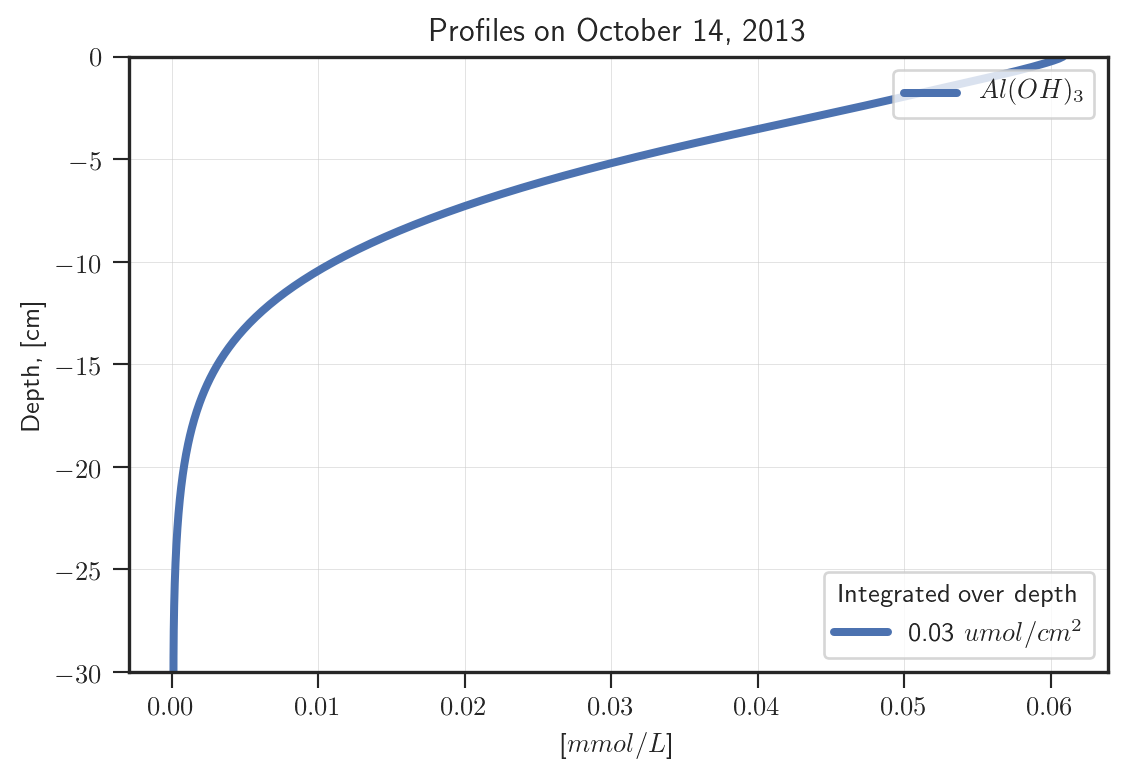

In [1518]:
ax = plotter.profile('sediment', ['AlOH3'], years_ago=y_a)

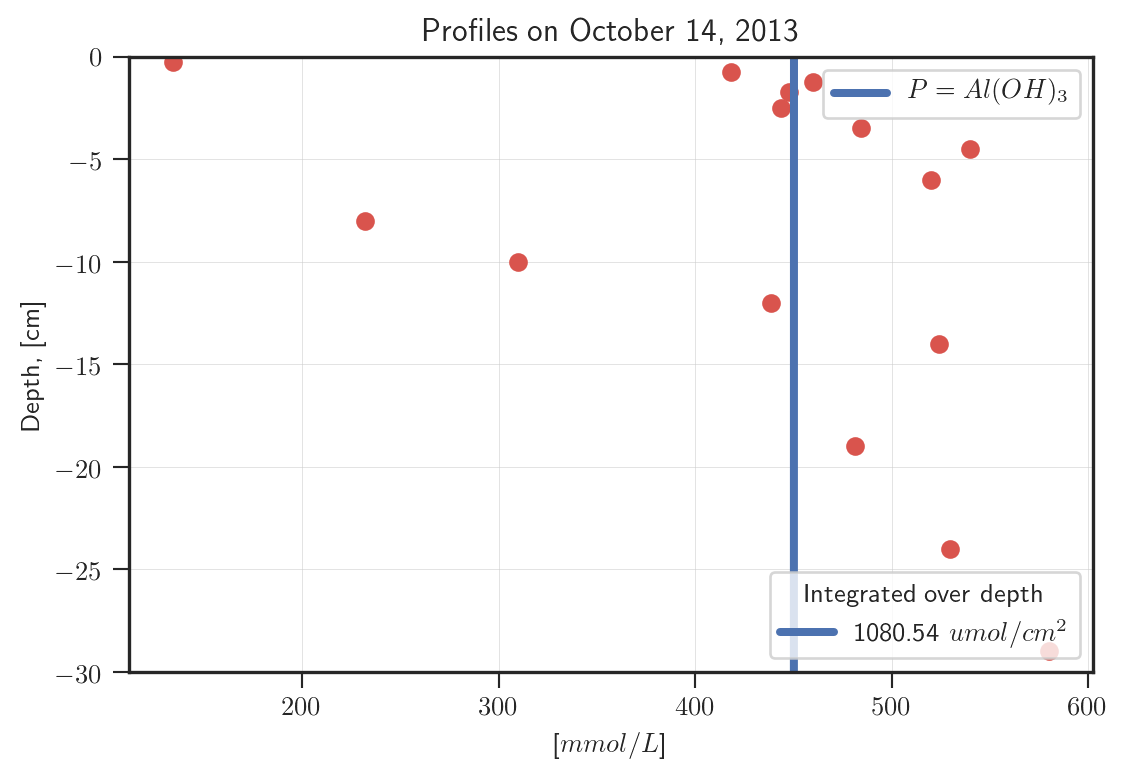

In [1519]:
ax = plotter.profile('sediment', ['PO4adsc'], years_ago=y_a)
plt.scatter(sediment_data['Al-P']/30.973*2500, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)
# plt.plot(yi, -z, '-.',c=sns.xkcd_rgb["pale red"], label=None)

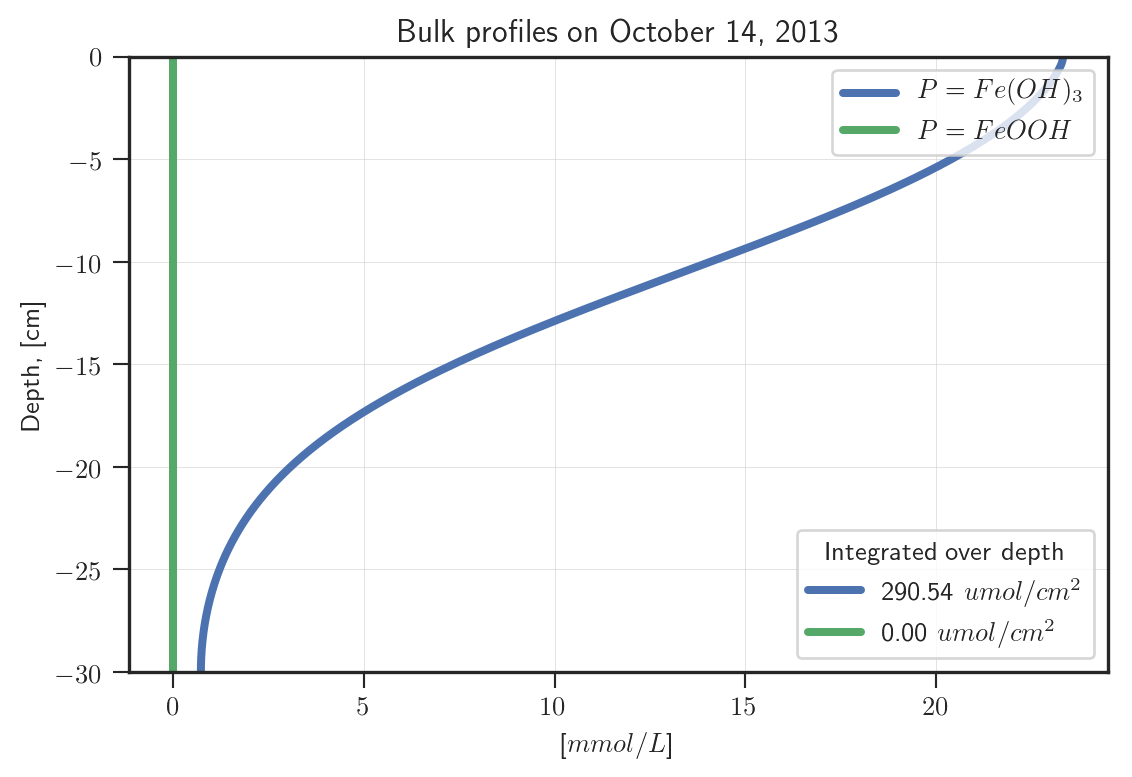

In [1520]:
ax = plotter.bulk_sediment_profile(['PO4adsa', 'PO4adsb'], years_ago=y_a)

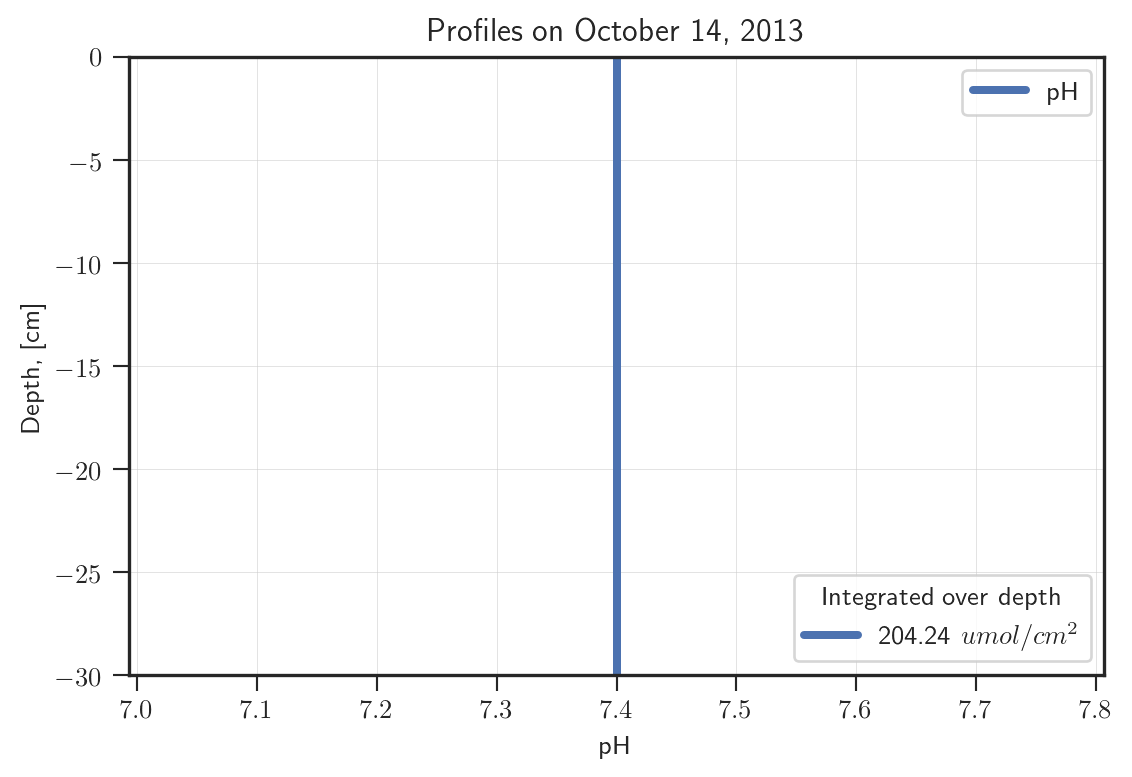

In [1521]:
ax = plotter.profile('sediment', ['pH'], years_ago=y_a)

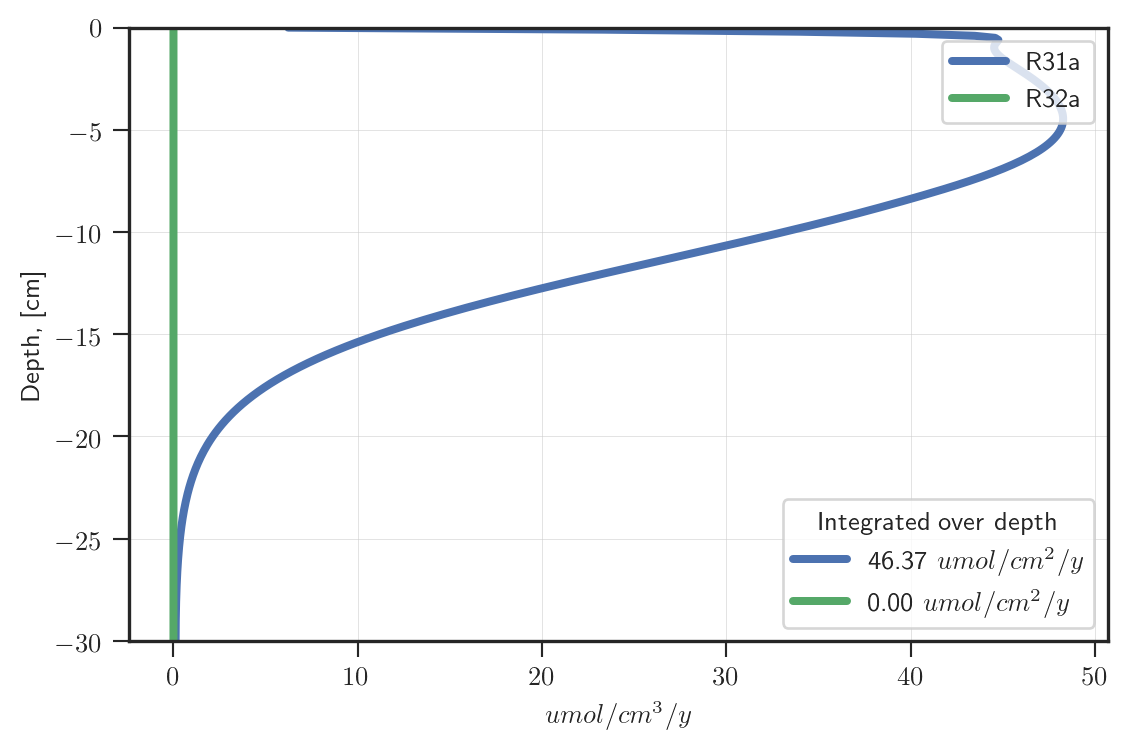

In [1522]:
ax = plotter.rate_profile('sediment', ['R31a', 'R32a'], years_ago=y_a)

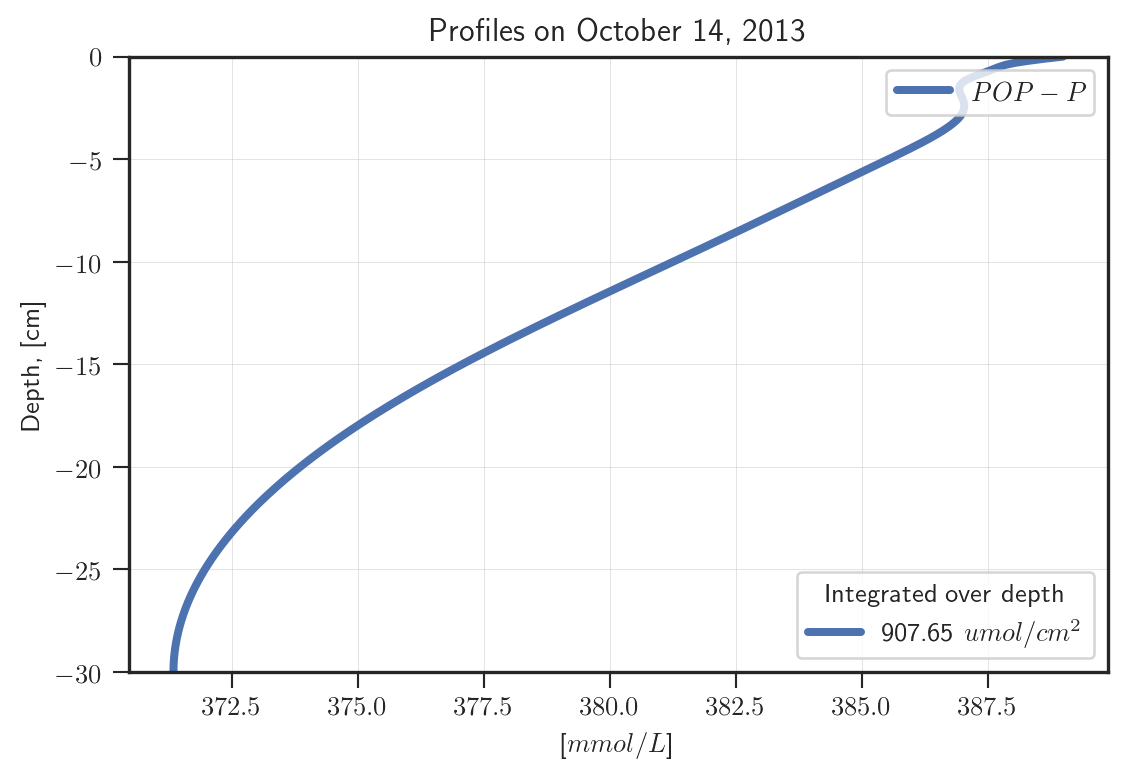

In [1523]:
ax = plotter.profile('sediment', ['POP'], years_ago=y_a)

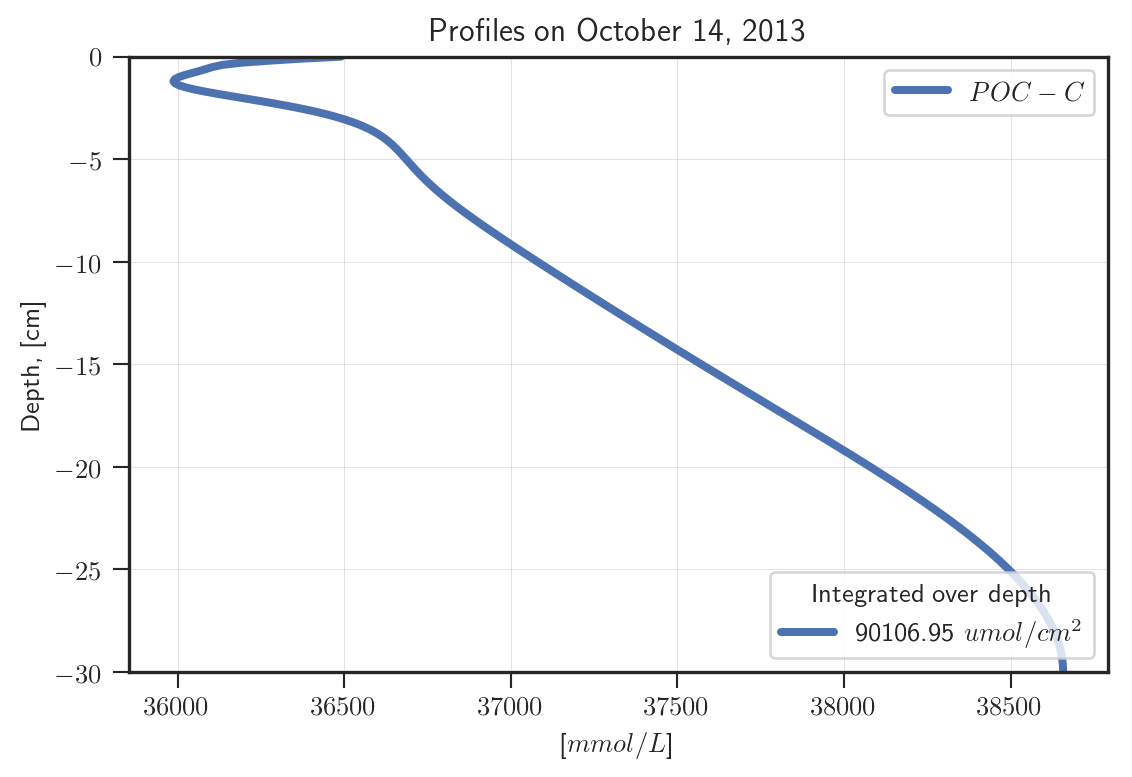

In [1524]:
ax = plotter.profile('sediment', ['POC'], years_ago=y_a)

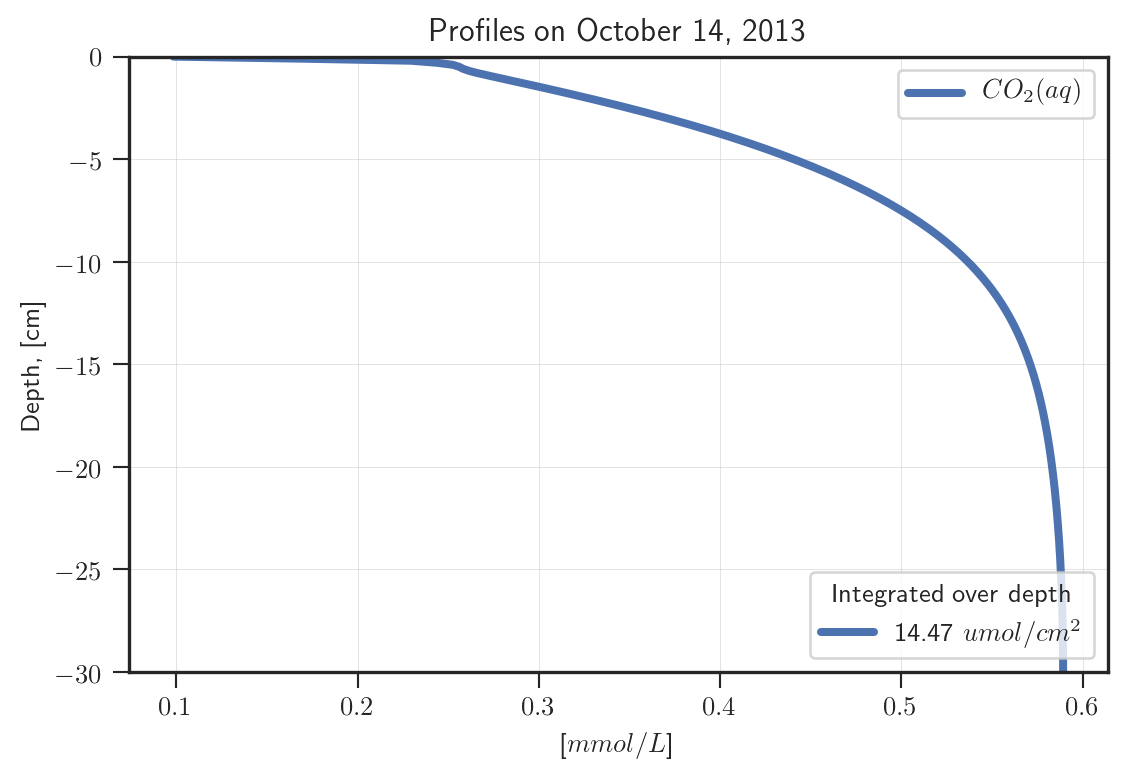

In [1525]:
ax = plotter.profile('sediment', ['CO2'], years_ago=y_a, convert_units=0)

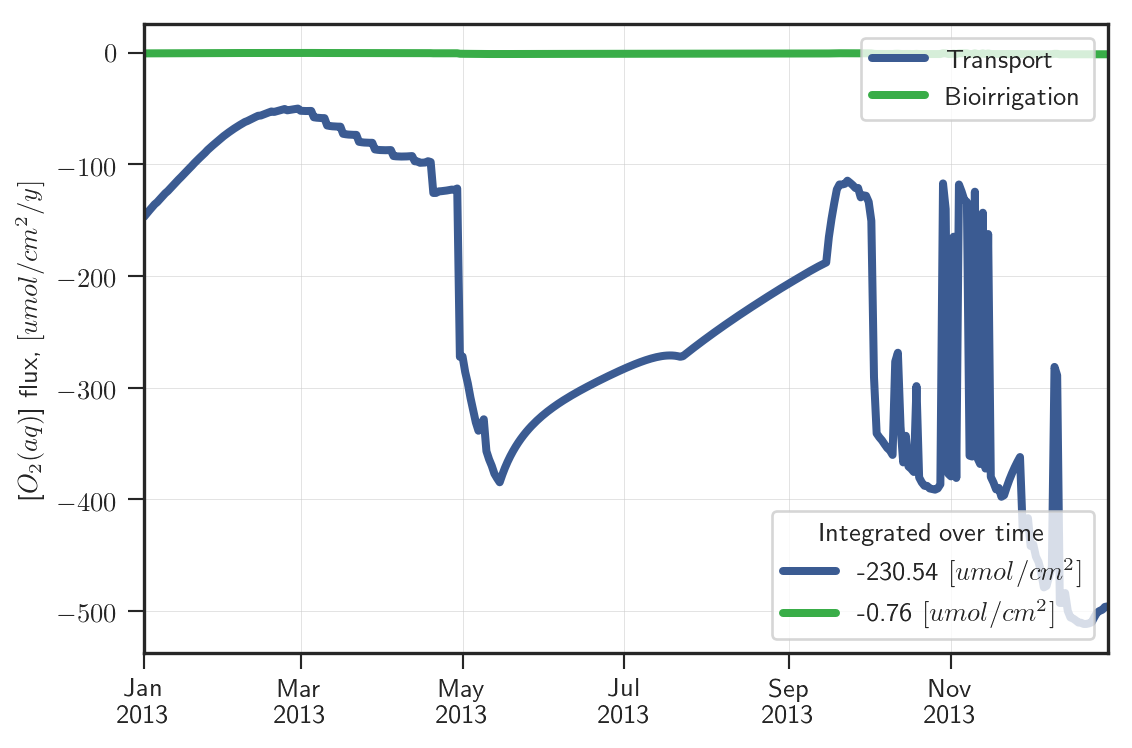

In [1526]:
plotter.flux('O2', convert_units=1)

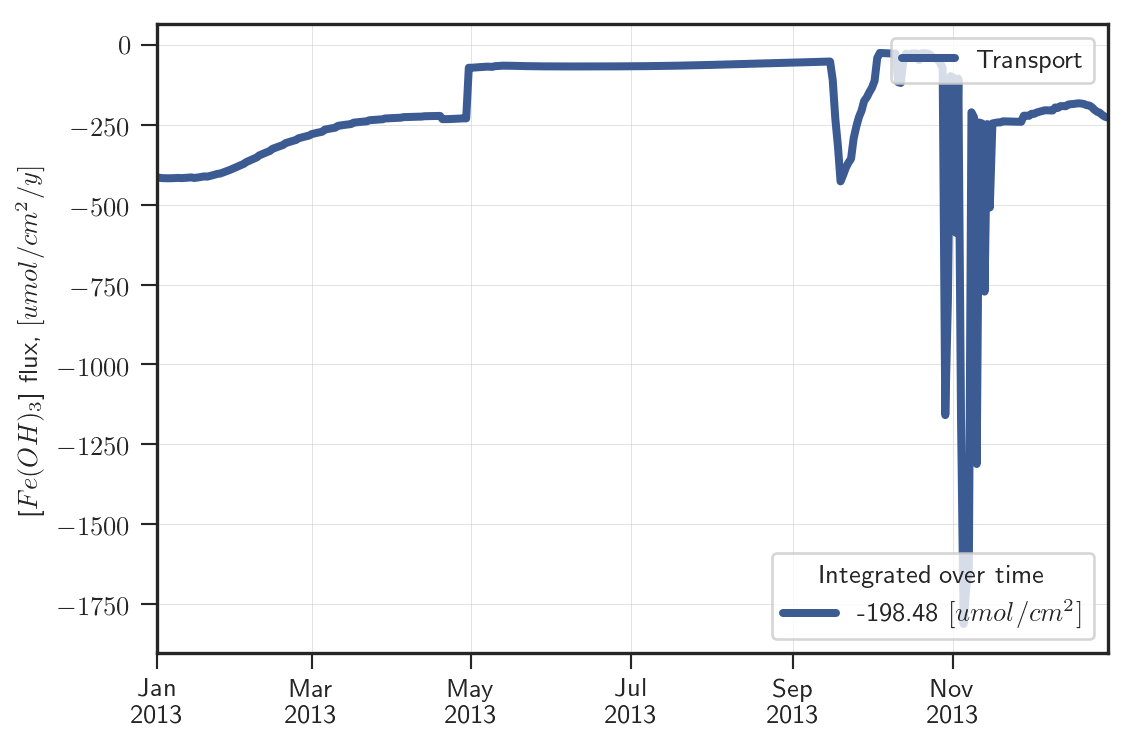

In [1527]:
plotter.flux('FeOH3', convert_units=1)

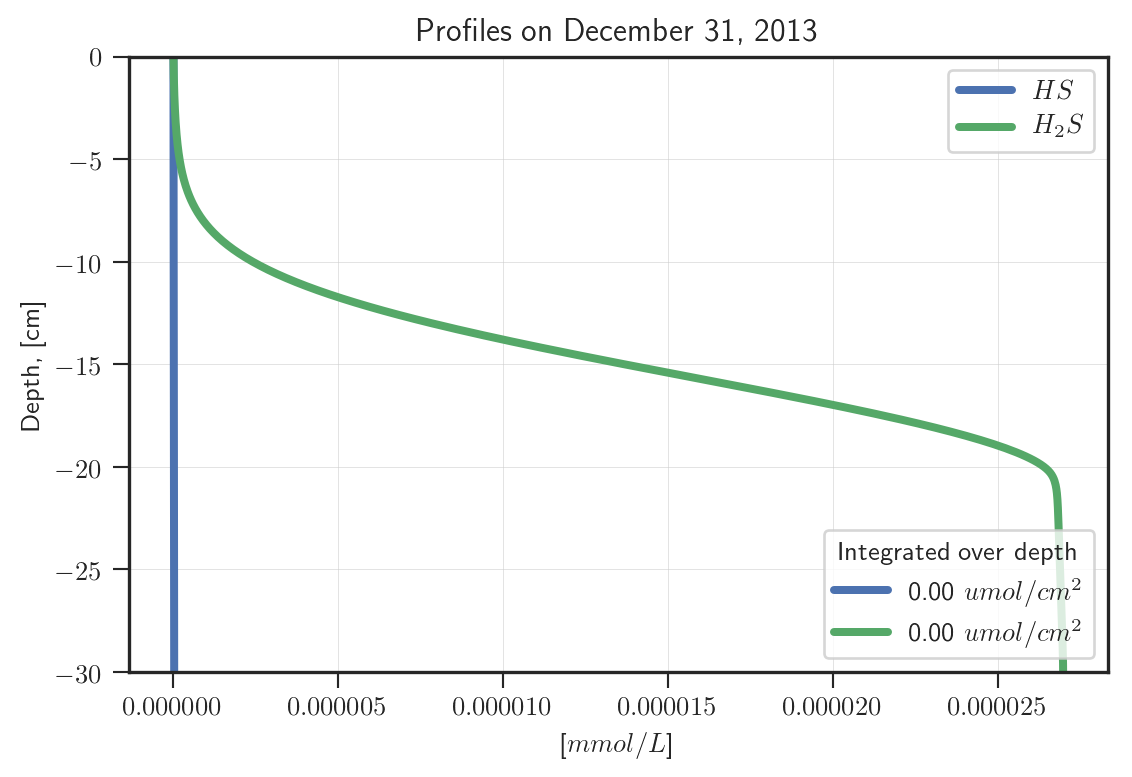

In [1528]:
ax = plotter.profile('sediment', ['HS', 'H2S'], years_ago=0)

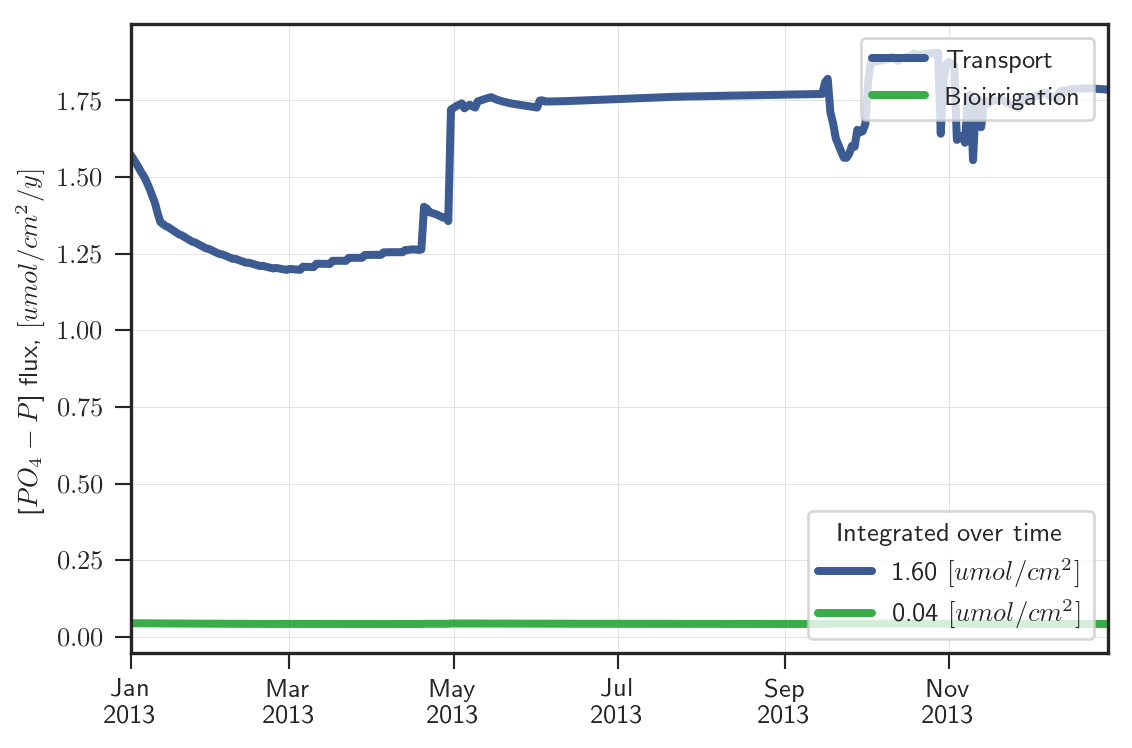

In [1529]:
plotter.flux('PO4', convert_units=True)

# 

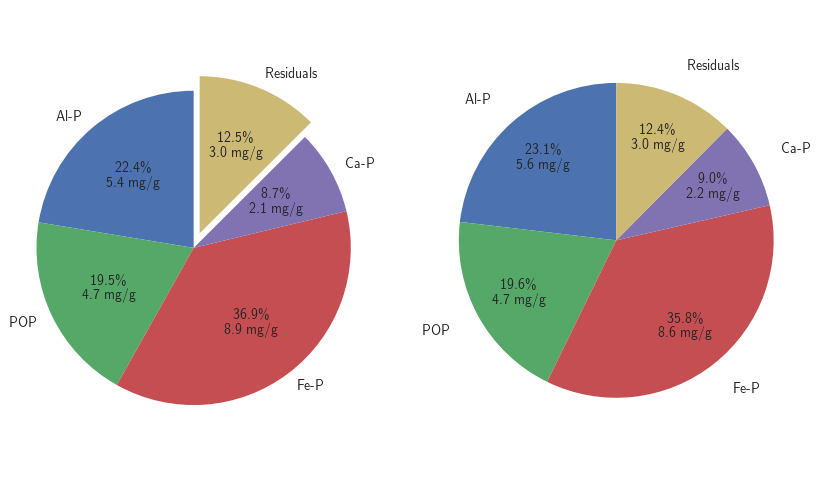

In [1530]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = pct*total/100.0
        return '{p:.1f}\%\n{v:.1f} mg/g'.format(p=pct,v=val)
    return my_autopct

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Al-P', 'POP','Fe-P', 'Ca-P', 'Residuals']
sizes = sediment_data[['Al-P', 'Organic-P','Fe-P', 'Ca-P', 'Residuals']][2:].mean().values
explode = (0, 0., 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, (ax1,ax2) = plt.subplots(1,2, figsize=(10,6), dpi=100)
ax1.pie(sizes, explode=explode, labels=labels, autopct=make_autopct(sizes),
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax1.set_xlabel('Measured')

zm = np.array([ 0.3,  0.8,  1.3,  1.8,  2.5 ,  3.5 ,  4.5 ,  6.  ,  8., 10.  , 12.  , 14.  , 19.  , 24.  , 29.  ])
idxs = np.in1d(plotter.sediment_results['basin1'][0,0]['z'][0, 0], zm).nonzero()[0]

POP = plotter.sediment_results['basin1'][0,0]['concentrations'][0, 0]['POP'][0, 0][:, -80]*30.973/2.5/1000
PO4adsc = plotter.sediment_results['basin1'][0,0]['concentrations'][0, 0]['PO4adsc'][0, 0][:, -80]*30.973/2.5/1000
PO4adsa = plotter.sediment_results['basin1'][0,0]['concentrations'][0, 0]['PO4adsa'][0, 0][:, -80]*30.973/2.5/1000
PO4adsb = plotter.sediment_results['basin1'][0,0]['concentrations'][0, 0]['PO4adsb'][0, 0][:, -80]*30.973/2.5/1000
Ca3PO42 = plotter.sediment_results['basin1'][0,0]['concentrations'][0, 0]['Ca3PO42'][0, 0][:, -80]*2*30.973/2.5/1000
Fe3PO42 = plotter.sediment_results['basin1'][0,0]['concentrations'][0, 0]['Fe3PO42'][0, 0][:, -80]*2*30.973/2.5/1000


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Al-P', 'POP','Fe-P', 'Ca-P', 'Residuals']
sizes = [PO4adsc[idxs].mean(), POP[idxs].mean(), PO4adsa[idxs].mean() + PO4adsb[idxs].mean() + Fe3PO42[idxs].mean(), Ca3PO42[idxs].mean(), 3]
explode = (0, 0., 0, 0, 0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')

ax2.pie(sizes, explode=explode, labels=labels, autopct=make_autopct(sizes), 
        shadow=False, startangle=90, labeldistance=1.2, pctdistance=0.7)
# plt.legend()
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# savefig('calibration/sediment_solid_fractions')

plt.show()

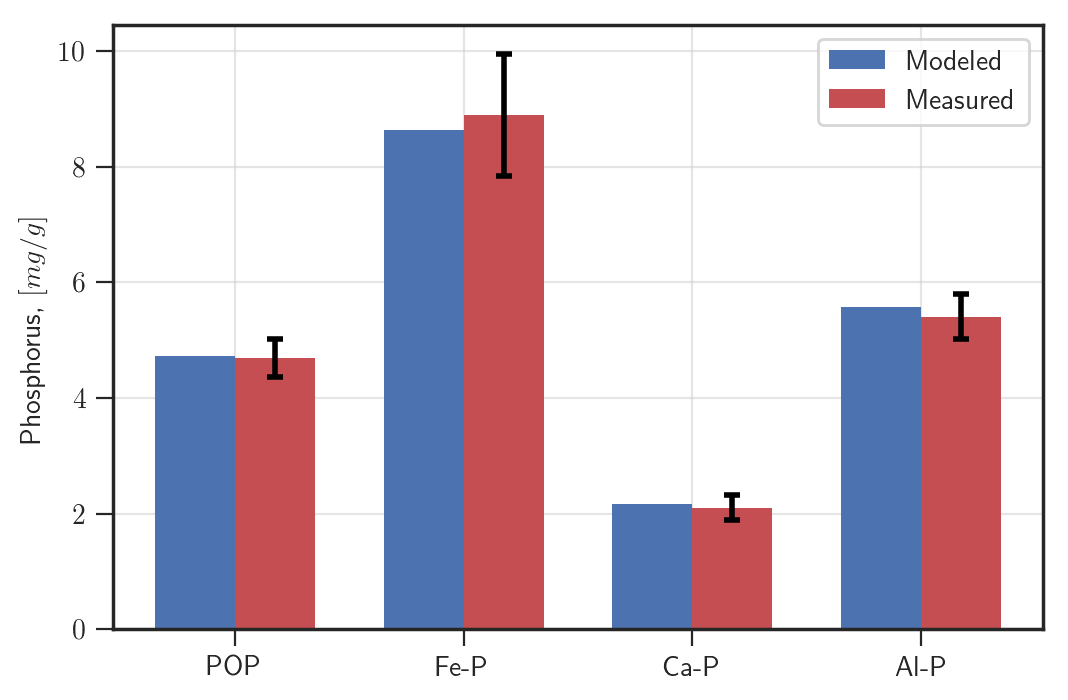

In [1531]:
N = 4
modeled = [POP[idxs].mean(), PO4adsa[idxs].mean() + PO4adsb[idxs].mean() + Fe3PO42[idxs].mean(), Ca3PO42[idxs].mean(),PO4adsc[idxs].mean()]
# men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(dpi=200)
rects1 = ax.bar(ind, modeled, width)

measured = sediment_data[['Organic-P','Fe-P', 'Ca-P', 'Al-P']][2:].mean().values
measured_std = sediment_data[['Organic-P','Fe-P', 'Ca-P', 'Al-P']][2:].sem().values
rects2 = ax.bar(ind + width, measured, width, yerr=measured_std, color=sns.color_palette("deep", 10)[2], error_kw=dict(lw=2, capsize=3, capthick=2))

# add some text for labels, title and axes ticks
ax.set_ylabel('Phosphorus, $[mg/g]$')
# ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('POP','Fe-P', 'Ca-P', 'Al-P'))

ax.legend((rects1[0], rects2[0]), ('Modeled', 'Measured'), frameon=1)
ax.grid(alpha=0.5)

# savefig('calibration/sediment_solid_bars')

plt.show()

In [1532]:
Ca3PO42[idxs].mean()/sediment_data[['Ca-P']][2:].mean()

Ca-P    1.028677
dtype: float64

In [1533]:
Fe3PO42[idxs].mean()

6.230209359823311

In [1534]:
PO4adsa[idxs].mean()

2.4078387241839567

In [1544]:
Ca2 = plotter.sediment_results['basin1'][0,0]['concentrations'][0, 0]['Ca2'][0, 0][:, -80]
PO4 = plotter.sediment_results['basin1'][0,0]['concentrations'][0, 0]['PO4'][0, 0][:, -75]
O2 = plotter.sediment_results['basin1'][0,0]['concentrations'][0, 0]['O2'][0, 0][:, -80]
Fe2d = plotter.sediment_results['basin1'][0,0]['concentrations'][0, 0]['Fe2d'][0, 0][:, -80]
SO4 = plotter.sediment_results['basin1'][0,0]['concentrations'][0, 0]['SO4'][0, 0][:, -80]
z = plotter.sediment_results['basin1'][0, 0]['z'][0, 0].flatten()

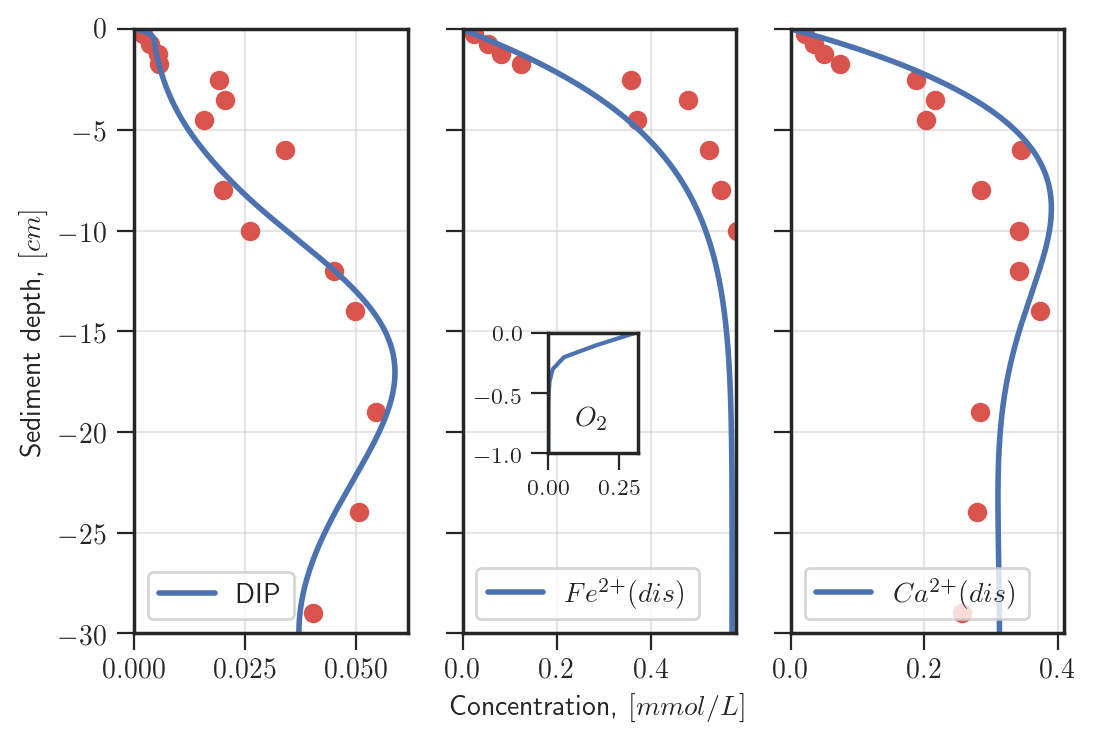

In [1557]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

fig, axes = plt.subplots(1, 3, dpi=200, sharey=True)



axes[0].plot(PO4, -z, label='DIP', lw=2)
axes[0].scatter(sediment_data['P']/30.973 + sediment_data['Loose-bound-P']/30.973, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)
# axes[0].set_xlim(0,0.4)

axes[1].scatter(sediment_data['Fe']/55.8, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)
axes[1].plot(Fe2d, -z, label='$Fe^{2+}(dis)$', lw=2)
# axes[1].set_xlim(0,0.8)

# left, bottom, width, height = [0.46, 0.58, 0.05, 0.1]
# ax2 = fig.add_axes([left, bottom, width, height])
# ax2.scatter(sediment_data['Fe']/55.8, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None, s=10)
# ax2.plot(Fe2d, -z, label='Fe^{2+}(dis)', lw=2)
# ax2.set_ylim(-2,0)
# ax2.set_xlim(0, 0.15)
# # ax2.text(0.1,-0.8,'O_2')

# for tick in ax2.xaxis.get_major_ticks():
#             tick.label.set_fontsize(8)
# for tick in ax2.yaxis.get_major_ticks():
#             tick.label.set_fontsize(8)

# axes[1].set_xlim(0,0.58)

axes[2].plot(Ca2, -z, label='$Ca^{2+}(dis)$', lw=2)
axes[2].scatter(sediment_data['Ca']/40.078, sediment_data['Depth'], c=sns.xkcd_rgb["pale red"], label=None)


left, bottom, width, height = [0.47, 0.35, 0.075, 0.15]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(O2, -z)
ax2.set_ylim(-1,0)
ax2.set_xlim(0, None)
ax2.text(0.1,-0.8,'$O_2$')

for tick in ax2.xaxis.get_major_ticks():
            tick.label.set_fontsize(8)
for tick in ax2.yaxis.get_major_ticks():
            tick.label.set_fontsize(8)
        
axes[0].set_ylabel('Sediment depth, $[cm]$')    
axes[1].set_xlabel('Concentration, $[mmol/L]$')    

        
for ax in axes:
    ax.grid(alpha=0.5)
    ax.set_ylim(-30,0)
    ax.legend(frameon=1, loc=3)
    ax.set_xlim(0, None)
    
# savefig('calibration/sediment_porewater4')

In [1537]:
POP = plotter.sediment_results['basin1'][0,0]['concentrations'][0, 0]['POP'][0, 0][:, -80]*30.973/2.5/1000
PO4adsc = plotter.sediment_results['basin1'][0,0]['concentrations'][0, 0]['PO4adsc'][0, 0][:, -80]*30.973/2.5/1000
PO4adsa = plotter.sediment_results['basin1'][0,0]['concentrations'][0, 0]['PO4adsa'][0, 0][:, -80]*30.973/2.5/1000
PO4adsb = plotter.sediment_results['basin1'][0,0]['concentrations'][0, 0]['PO4adsb'][0, 0][:, -80]*30.973/2.5/1000
Ca3PO42 = plotter.sediment_results['basin1'][0,0]['concentrations'][0, 0]['Ca3PO42'][0, 0][:, -80]*2*30.973/2.5/1000
Fe3PO42 = plotter.sediment_results['basin1'][0,0]['concentrations'][0, 0]['Fe3PO42'][0, 0][:, -80]*2*30.973/2.5/1000



(0, 1)

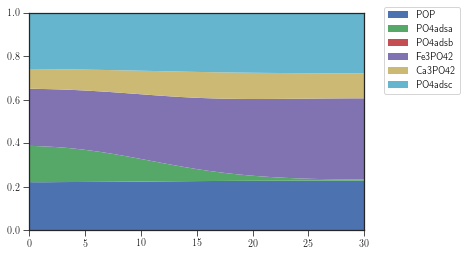

In [1538]:
plt.stackplot( z, POP/sum([POP, PO4adsa, PO4adsb, Fe3PO42, Ca3PO42,PO4adsc]), PO4adsa/sum([POP, PO4adsa, PO4adsb, Fe3PO42, Ca3PO42,PO4adsc]), PO4adsb/sum([POP, PO4adsa, PO4adsb, Fe3PO42, Ca3PO42,PO4adsc]), Fe3PO42/sum([POP, PO4adsa, PO4adsb, Fe3PO42, Ca3PO42,PO4adsc]), Ca3PO42/sum([POP, PO4adsa, PO4adsb, Fe3PO42, Ca3PO42,PO4adsc]),PO4adsc/sum([POP, PO4adsa, PO4adsb, Fe3PO42, Ca3PO42,PO4adsc]))
plt.legend(['POP', 'PO4adsa', 'PO4adsb', 'Fe3PO42', 'Ca3PO42','PO4adsc'], bbox_to_anchor=(1.3,1.05), frameon=1)
plt.xlim(0,30)
plt.ylim(0,1)

(0, 30)

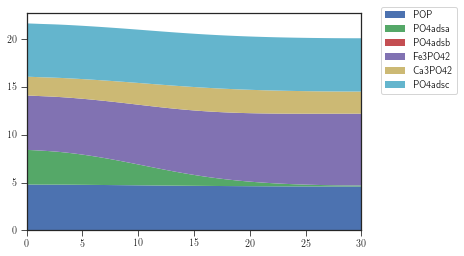

In [1539]:
plt.stackplot( z, POP, PO4adsa, PO4adsb, Fe3PO42, Ca3PO42,PO4adsc)
plt.legend(['POP', 'PO4adsa', 'PO4adsb', 'Fe3PO42', 'Ca3PO42','PO4adsc'], bbox_to_anchor=(1.3,1.05), frameon=1)
plt.xlim(0,30)
# plt.ylim(0,1)

In [1559]:
0.68/0.58*0.075

0.08793103448275863